# Import Libraries

In [89]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


# Plot Param Initialization

In [90]:
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 24
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    #


# Original Data By Stratified Sampling

In [91]:
org_train_frame_x = pd.read_csv('data/original/original_x_train.csv')
org_train_frame_y = pd.read_csv('data/original/original_y_train.csv')
org_test_frame_x = pd.read_csv('data/original/original_x_test.csv')
org_test_frame_y = pd.read_csv('data/original/original_y_test.csv')

#  Normalized Data 

Min-Max Normalization data was dumped to CSV then used here

In [92]:
mNorm_train_frame_x = pd.read_csv('data/mNorm/X_train.csv')
mNorm_train_frame_y = pd.read_csv('data/mNorm/y_train.csv')
mNorm_test_frame_x = pd.read_csv('data/mNorm/X_test.csv')
mNorm_test_frame_y = pd.read_csv('data/mNorm/y_test.csv')

Z normalization data from csv dumped

In [93]:
zNorm_train_frame_x = pd.read_csv('data/zNorm/X_train.csv')
zNorm_train_frame_y = pd.read_csv('data/zNorm/y_train.csv')
zNorm_test_frame_x = pd.read_csv('data/zNorm/X_test.csv')
zNorm_test_frame_y = pd.read_csv('data/zNorm/y_test.csv')

# New Feature representation data 

Factor Analysis based feature Representation 

In [94]:
fa_train_frame_x = pd.read_csv('data/fa/X_train.csv')
fa_train_frame_y = pd.read_csv('data/fa/y_train.csv')
fa_test_frame_x = pd.read_csv('data/fa/X_test.csv')
fa_test_frame_y = pd.read_csv('data/fa/y_test.csv')

Lad based feature representation data

In [95]:
lda_train_frame_x = pd.read_csv('data/lda/X_train.csv')
lda_train_frame_y = pd.read_csv('data/lda/y_train.csv')
lda_test_frame_x = pd.read_csv('data/lda/X_test.csv')
lda_test_frame_y = pd.read_csv('data/lda/y_test.csv')

pca based feature representation data

In [96]:
pca_train_frame_x = pd.read_csv('data/pca/X_train.csv')
pca_train_frame_y = pd.read_csv('data/pca/y_train.csv')
pca_test_frame_x = pd.read_csv('data/pca/X_test.csv')
pca_test_frame_y = pd.read_csv('data/pca/y_test.csv')

tsne based feature representation data

In [97]:
tsne_train_frame_x = pd.read_csv('data/tsne/X_train.csv')
tsne_train_frame_y = pd.read_csv('data/tsne/y_train.csv')
tsne_test_frame_x = pd.read_csv('data/tsne/X_test.csv')
tsne_test_frame_y = pd.read_csv('data/tsne/y_test.csv')

#  Custom Helper Functions

In [98]:
"""
input: tr_x,tr_y,te_x,te_y
tr_x = Training frame 
tr_y = Training Labels
te_x = Testing frame
te_y = Testing Labels
output: train_x,train_y,test_x,test_y 
train_x = Numpy Array of training data,
train_y = Numpy Array of training labels 
test_x = Numpy Array of testing data
test_y = Numpy Array of testing labels
"""
def data_fram_to_array(tr_x,tr_y,te_x,te_y):
    train_x = np.array(tr_x)
    train_y = np.array(tr_y)

    test_x = np.array(te_x)
    test_y = np.array(te_y)
    return train_x,train_y,test_x,test_y 
# Y = to_categorical(Y)

"""
input: label_y,label_encoder
label_y = Numpy Label array 
label_encoder = Label Encoder 
output: label_y
label_y = Transformed Categorical Labels by Label Encoding
"""
def Label_Encoding(label_y,label_encoder):
#     label_encoder = LabelEncoder()
    label_encoder.fit(label_y) 
    label_y = label_encoder.transform(label_y)
    label_y = to_categorical(label_y)
    return label_y

# Function to Test the Trained Model passed as parameter 
"""
input: train_xx, train_yy, test_xx,test_yy,model,te_size,val_split,epoch,batch_size
train_xx = Training data array 
train_yy = Training Label array 
test_xx = Testing data array
test_yy = testing data label
model = copiled model 
te_size = number of items to test 
val_split = cross validation percentage for model fitting
epoch = iteration number 
batch_size = batch number
"""
def NN_Model_Result(train_xx, train_yy, test_xx,
                    test_yy,model,te_size,val_split,
                    epoch,batch_size):
    #Label creation
    label_encoder = LabelEncoder()
    train_yy = Label_Encoding(train_yy,label_encoder)
    test_yy = Label_Encoding(test_yy,label_encoder)
    #fitting
    history = model.fit(train_xx, train_yy,validation_split=val_split, epochs = epoch, batch_size = batch_size)
    #plotting 
    plt.plot(history.history['accuracy'],marker = 'D',label ='train')
    plt.plot(history.history['val_accuracy'],marker = '<',label='valid')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    # plt.legend(['train', 'test'], loc='upper left')
    plt.legend()
#     plt.savefig("accuracy_plot.png",bbox_inches= "tight")
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'],marker = 'D',label ='train')
    plt.plot(history.history['val_loss'],marker = '<',label='valid')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
#     plt.savefig("loss_plot_nn.png",bbox_inches= "tight")
    plt.show()
    
    #Evaluation
    scores = model.evaluate(test_xx, test_yy)
    #Accuracy Score
    for i, m in enumerate(model.metrics_names):
        print("\n%s: %.3f"% (m, scores[i]))
    #predictioin
    idx = np.random.randint(len(test_xx),size = te_size)
    pred = model.predict(test_xx[idx,:])
    
    #Prediction Summary Generation with precison recall and f1 and confusion matrix
    pred_ = np.argmax(pred, axis=1)
    pred_ = label_encoder.inverse_transform(pred_)
#     true_y = label_encoder.inverse_transform(np.argmax(to_categorical(test_yy[:test_size]), axis = 1)[:,1])
    true_y = label_encoder.inverse_transform(np.argmax(to_categorical(test_yy[idx,:]), axis = 1)[:,1])
    room_estimation_performance_report = classification_report(true_y, pred_,output_dict=True) 
    #Prediction Heatmap Recall Precision
    display(room_estimation_performance_report)
    sns.heatmap(pd.DataFrame(room_estimation_performance_report).iloc[:-1, :].T,cmap="Blues", annot=True)
#     plt.savefig("performance_plot_NN.png",bbox_inches= "tight")
    plt.show()
    conf_matrix=confusion_matrix(true_y,pred_)
    display(conf_matrix)
    sns.heatmap(conf_matrix,cmap="Blues", annot=True)
#     plt.savefig("confusion_matrix_plot.png",bbox_inches= "tight")
    plt.show()
#     print(conf_matrix)
#     return room_estimation_performance_report,conf_matrix


# Cross Validated Score with Error Bar 
"""
input: model, x, y, seed=123, kfold=10
model =  model for cross validation
x = cross validation data 
y = cross validation labels
seed = random number with default 123
kfold = number of fold for cross validation
"""
def cv_score(model, x, y, seed=123, kfold=10):
    # Scikit KFold cross validation init
    cv = KFold(n_splits=kfold, shuffle=True, random_state=seed)
    
    #cross validation with metrics
    scores_ = cross_validate(model, x, y, \
                             scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'), \
                             cv=cv, n_jobs=-1)
    print(scores_)

    
    acc_scores = scores_['test_accuracy']
    prc_scores = scores_['test_precision_macro']
    rcl_scores = scores_['test_recall_macro']
    f1_scores = scores_['test_f1_macro']
    
    means = []
    errors = []

    acc_mean = np.mean(acc_scores)
    acc_error = np.std(acc_scores)/np.sqrt(len(acc_scores))
    print("accuracy: ", acc_mean, acc_error)
    means.append(acc_mean)
    errors.append(acc_error)

    prc_mean = np.mean(prc_scores)
    prc_error = np.std(prc_scores)/np.sqrt(len(prc_scores))
    print("precision: ", prc_mean, prc_error)
    means.append(prc_mean)
    errors.append(prc_error)

    rcl_mean = np.mean(rcl_scores)
    rcl_error = np.std(rcl_scores)/np.sqrt(len(rcl_scores))
    print("recall: ", prc_mean, prc_error)
    means.append(rcl_mean)
    errors.append(rcl_error)
    
    f1_mean = np.mean(f1_scores)
    f1_error = np.std(f1_scores)/np.sqrt(len(f1_scores))
    print("f1: ", f1_mean, f1_error)
    means.append(f1_mean)
    errors.append(f1_error)

#     xlbl = ["Accuracy", "Precision", "Recall", "F1-score"]

#     plt.bar(xlbl, means, yerr=errors,color=["green","blue","orange","red"] ) #label="accuracy")
# #     plt.errorbar(xlbl, means, yerr=errors, fmt='o', color="red")
#     plt.ylabel("Mean")
#     plt.xlabel("Metric")
#     plt.title("Cross-validation results with error(std. error) bar")
#     plt.legend()
#     plt.show()
    

# Transform All type of data to numpy Array


In [99]:
org_train_x,org_train_y,org_test_x,org_test_y = data_fram_to_array(org_train_frame_x,org_train_frame_y,
                                                                   org_test_frame_x,org_test_frame_y)
mNorm_train_x,mNorm_train_y,mNorm_test_x,mNorm_test_y = data_fram_to_array(mNorm_train_frame_x,mNorm_train_frame_y,
                                                                           mNorm_test_frame_x,mNorm_test_frame_y)
zNorm_train_x,zNorm_train_y,zNorm_test_x,zNorm_test_y = data_fram_to_array(zNorm_train_frame_x,zNorm_train_frame_y,
                                                                           zNorm_test_frame_x,zNorm_test_frame_y )
fa_train_x,fa_train_y,fa_test_x,fa_test_y = data_fram_to_array(fa_train_frame_x,fa_train_frame_y,
                                                               fa_test_frame_x,fa_test_frame_y)
lda_train_x,lda_train_y,lda_test_x,lda_test_y = data_fram_to_array(lda_train_frame_x,lda_train_frame_y,
                                                                   lda_test_frame_x,lda_test_frame_y)
pca_train_x,pca_train_y,pca_test_x,pca_test_y = data_fram_to_array(pca_train_frame_x,pca_train_frame_y,
                                                                   pca_test_frame_x,pca_test_frame_y)
tsne_train_x,tsne_train_y,tsne_test_x,tsne_test_y = data_fram_to_array(tsne_train_frame_x,tsne_train_frame_y,
                                                                       tsne_test_frame_x,tsne_test_frame_y)

# Experiment with Original Data with no feature reduction and tranformation


In [100]:
input_dim = len(org_train_frame_x.columns)
def create_model_org():
    model = Sequential()
    model.add(L.Dense(12, input_dim=input_dim, activation='softsign'))
    model.add(L.Dense(12, activation='softsign'))
    model.add(L.Dense(4, activation='softsign'))
    model.add(L.Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer = 'Nadam', metrics=['accuracy'])
    return model

confidence interval by cross validation for different metric 

In [101]:

# grid search for initializer, batch size and number of epochs
adam_model = KerasClassifier(create_model_org,epochs=20, batch_size=20, verbose=0)
adam_model.fit(org_train_x, org_train_y.ravel())
X = np.concatenate([org_train_x, org_test_x], axis=0)
y = np.concatenate([org_train_y, org_test_y], axis=0)
# cv_score(adam_model, org_train_x, org_train_y.ravel())
cv_score(adam_model, X, y.ravel())

/var/folders/k3/yr6xqkcd6dx_w09lmqq7y7h80000gn/T/ipykernel_93228/1491621624.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  adam_model = KerasClassifier(create_model_org,epochs=20, batch_size=20, verbose=0)
2022-12-03 18:13:12.825998: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-03 18:13:12.826096: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, re

32/32 [==============================] - 0s 510us/step
{'fit_time': array([17.07325697, 17.17953706, 17.03439116, 17.27633715, 21.25622773,
       16.80754399, 21.31627798, 17.07044029,  7.18596888,  7.19788384]), 'score_time': array([0.17406106, 0.13451815, 0.17593193, 0.11834073, 0.11196518,
       0.27925086, 0.11712527, 0.14855981, 0.0762732 , 0.07496595]), 'test_accuracy': array([0.98914116, 0.9911155 , 0.994077  , 0.988154  , 0.98914116,
       0.99012833, 0.9911155 , 0.99210267, 0.98914116, 0.98517787]), 'test_precision_macro': array([0.96814541, 0.96985021, 0.98038934, 0.96470588, 0.96898335,
       0.97272432, 0.96428571, 0.97309982, 0.96748975, 0.95944529]), 'test_recall_macro': array([0.96324324, 0.96624722, 0.9775974 , 0.96649551, 0.96591553,
       0.97001285, 0.97554348, 0.97395946, 0.96168831, 0.94428854]), 'test_f1_macro': array([0.96434157, 0.96706611, 0.97850708, 0.96310177, 0.96614885,
       0.97043688, 0.96791209, 0.97228417, 0.96389384, 0.94926595])}
accuracy:  0.

In [102]:
model_org = create_model_org()

 Training and Evaluation on Original Data 

Epoch 1/15
140/993 [===>..........................] - ETA: 0s - loss: 0.0509 - accuracy: 0.9857

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


993/993 [==============================] - 1s 918us/step - loss: 0.0368 - accuracy: 0.9897 - val_loss: 0.0366 - val_accuracy: 0.9897
Epoch 2/15
993/993 [==============================] - 1s 895us/step - loss: 0.0385 - accuracy: 0.9885 - val_loss: 0.0356 - val_accuracy: 0.9897
Epoch 3/15
993/993 [==============================] - 1s 878us/step - loss: 0.0382 - accuracy: 0.9887 - val_loss: 0.0626 - val_accuracy: 0.9765
Epoch 4/15
993/993 [==============================] - 1s 875us/step - loss: 0.0323 - accuracy: 0.9897 - val_loss: 0.0318 - val_accuracy: 0.9906
Epoch 5/15
993/993 [==============================] - 1s 873us/step - loss: 0.0379 - accuracy: 0.9883 - val_loss: 0.0506 - val_accuracy: 0.9840
Epoch 6/15
993/993 [==============================] - 1s 875us/step - loss: 0.0347 - accuracy: 0.9895 - val_loss: 0.0304 - val_accuracy: 0.9915
Epoch 7/15
993/993 [==============================] - 1s 876us/step - loss: 0.0385 - accuracy: 0.9879 - val_loss: 0.0391 - val_accuracy: 0.9873
Epo

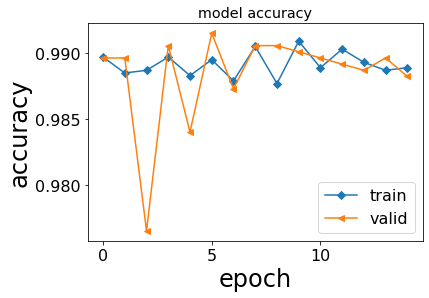

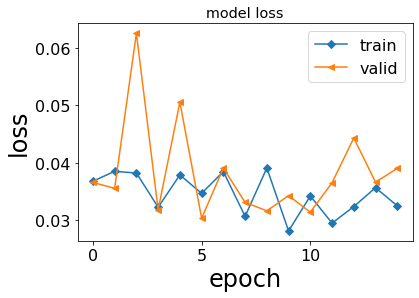

95/95 [==============================] - 0s 560us/step - loss: 0.0483 - accuracy: 0.9855

loss: 0.048

accuracy: 0.986
95/95 [==============================] - 0s 444us/step


{'0': {'precision': 0.9959546925566343,
  'recall': 0.9995939910678034,
  'f1-score': 0.9977710233029381,
  'support': 2463},
 '1': {'precision': 1.0,
  'recall': 0.9922480620155039,
  'f1-score': 0.9961089494163424,
  'support': 129},
 '2': {'precision': 0.9951690821256038,
  'recall': 0.9279279279279279,
  'f1-score': 0.9603729603729604,
  'support': 222},
 '3': {'precision': 0.9267241379310345,
  'recall': 0.9555555555555556,
  'f1-score': 0.9409190371991248,
  'support': 225},
 'accuracy': 0.9907864429088517,
 'macro avg': {'precision': 0.9794619781533183,
  'recall': 0.9688313841416977,
  'f1-score': 0.9737929925728414,
  'support': 3039},
 'weighted avg': {'precision': 0.9909433613140365,
  'recall': 0.9907864429088517,
  'f1-score': 0.9907593502607585,
  'support': 3039}}

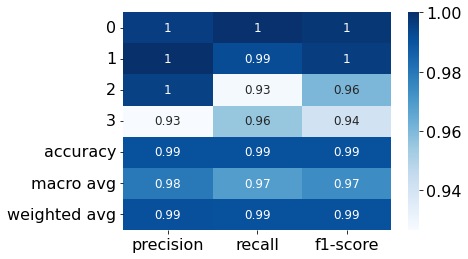

array([[2462,    0,    0,    1],
       [   0,  128,    1,    0],
       [   0,    0,  206,   16],
       [  10,    0,    0,  215]])

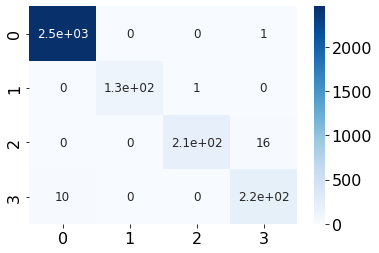

In [134]:
NN_Model_Result(org_train_x, org_train_y,org_test_x, org_test_y,model_org,len(org_test_x),.30,15,5)

In [104]:
# CTEs =  [0.9818304726305069,0.9513499003807213,0.9513499003807213,0.9497653512725016]
# error =[0.004437797577820739,0.01148932477770954,0.01148932477770954,0.009203141244808755]
# types = ['Accuracy','Precision', 'Recall', 'F1-score']
# x_pos = np.arange(len(types))
# fig, ax = plt.subplots()
# ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
# ax.set_ylabel('Performance')
# ax.set_xticks(x_pos)
# ax.set_xticklabels(types)
# ax.set_title('Error Bar NN Adam Optimizer')
# ax.yaxis.grid(True)
# ax.set_ylim(0.90,.99)
# # Save the figure and show
# plt.tight_layout()
# plt.savefig('NN_error_bar_SCros_Valid_Adam.png')
# plt.show()

# Experiment when data transformed by Min-max Normalization 

In [105]:
input_dim = len(mNorm_train_frame_x.columns)
def create_model_mNorm():
    model = Sequential()
    model.add(L.Dense(12, input_dim=input_dim, activation='softsign'))
    model.add(L.Dense(12, activation='softsign'))
    model.add(L.Dense(4, activation='softsign'))
    model.add(L.Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer = 'Nadam', metrics=['accuracy'])
    return model

Confidence interval for model learned on min max normalized data 

In [106]:
adam_model = KerasClassifier(create_model_mNorm,epochs=20, batch_size=20, verbose=0)
adam_model.fit(mNorm_train_x, mNorm_train_y.ravel())
X = np.concatenate([mNorm_train_x, mNorm_test_x], axis=0)
y = np.concatenate([mNorm_train_y, mNorm_test_y], axis=0)
cv_score(adam_model, X, y.ravel())

/var/folders/k3/yr6xqkcd6dx_w09lmqq7y7h80000gn/T/ipykernel_93228/3148792749.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  adam_model = KerasClassifier(create_model_mNorm,epochs=20, batch_size=20, verbose=0)


32/32 [==============================] - 0s 598us/step
{'fit_time': array([20.75944304, 21.01743722, 20.68071485, 20.38409805, 20.75298381,
       20.71518016, 20.57675004, 20.79729486,  9.07147288,  9.00996709]), 'score_time': array([0.19055295, 0.09745288, 0.21633005, 0.28581095, 0.19419718,
       0.18257308, 0.20727181, 0.11811519, 0.10762215, 0.10328722]), 'test_accuracy': array([0.9911155 , 0.99605133, 0.9970385 , 0.99210267, 0.99308983,
       0.994077  , 0.99308983, 0.99308983, 0.99308983, 0.98913043]), 'test_precision_macro': array([0.96819853, 0.98983254, 0.98957937, 0.97492719, 0.97832145,
       0.98350366, 0.9724522 , 0.97502289, 0.97624269, 0.96613973]), 'test_recall_macro': array([0.96995495, 0.9820231 , 0.98850474, 0.97273792, 0.97863155,
       0.97867893, 0.97715378, 0.98116249, 0.97956225, 0.95818815]), 'test_f1_macro': array([0.96811416, 0.98564075, 0.98900889, 0.97305606, 0.97845289,
       0.98079199, 0.97456573, 0.97776966, 0.97784468, 0.96009843])}
accuracy:  0.

In [107]:
model_mNorm = create_model_mNorm()

training and evaluation on min max normalized data 

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/15
993/993 [==============================] - 1s 980us/step - loss: 0.0124 - accuracy: 0.9950 - val_loss: 0.0258 - val_accuracy: 0.9920
Epoch 2/15
993/993 [==============================] - 1s 948us/step - loss: 0.0117 - accuracy: 0.9950 - val_loss: 0.0281 - val_accuracy: 0.9915
Epoch 3/15
993/993 [==============================] - 1s 938us/step - loss: 0.0106 - accuracy: 0.9956 - val_loss: 0.0284 - val_accuracy: 0.9906
Epoch 4/15
993/993 [==============================] - 1s 937us/step - loss: 0.0102 - accuracy: 0.9958 - val_loss: 0.0257 - val_accuracy: 0.9925
Epoch 5/15
993/993 [==============================] - 1s 963us/step - loss: 0.0110 - accuracy: 0.9960 - val_loss: 0.0257 - val_accuracy: 0.9920
Epoch 6/15
993/993 [==============================] - 1s 951us/step - loss: 0.0094 - accuracy: 0.9968 - val_loss: 0.0317 - val_accuracy: 0.9911
Epoch 7/15
993/993 [==============================] - 1s 922us/step - loss: 0.0109 - accuracy: 0.9956 - val_loss: 0.0228 - val_accuracy:

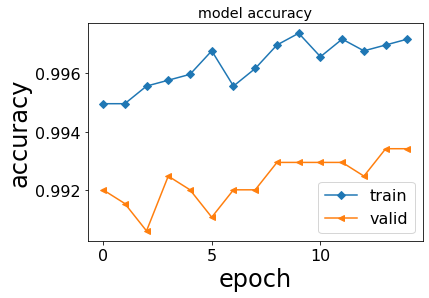

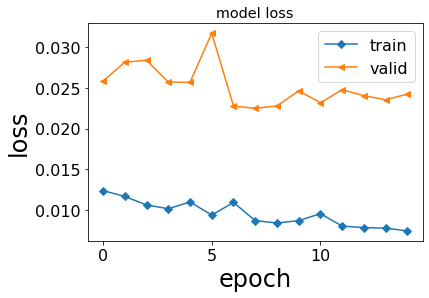

95/95 [==============================] - 0s 631us/step - loss: 0.0155 - accuracy: 0.9961

loss: 0.015

accuracy: 0.996
95/95 [==============================] - 0s 523us/step


{'0': {'precision': 0.9979879275653923,
  'recall': 1.0,
  'f1-score': 0.9989929506545822,
  'support': 2480},
 '1': {'precision': 1.0,
  'recall': 0.9930555555555556,
  'f1-score': 0.9965156794425087,
  'support': 144},
 '2': {'precision': 0.9743589743589743,
  'recall': 0.9743589743589743,
  'f1-score': 0.9743589743589743,
  'support': 195},
 '3': {'precision': 0.9768518518518519,
  'recall': 0.9590909090909091,
  'f1-score': 0.9678899082568807,
  'support': 220},
 'accuracy': 0.9950641658440277,
 'macro avg': {'precision': 0.9872996884440546,
  'recall': 0.9816263597513597,
  'f1-score': 0.9844393781782366,
  'support': 3039},
 'weighted avg': {'precision': 0.9950370081505694,
  'recall': 0.9950641658440277,
  'f1-score': 0.9950432890028296,
  'support': 3039}}

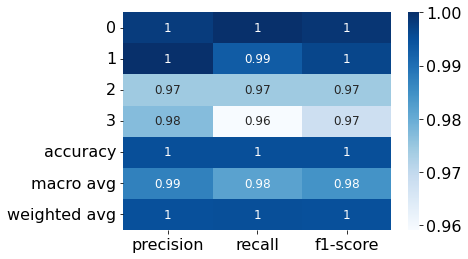

array([[2480,    0,    0,    0],
       [   1,  143,    0,    0],
       [   0,    0,  190,    5],
       [   4,    0,    5,  211]])

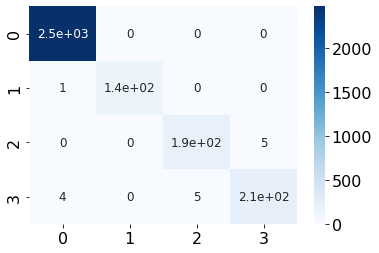

In [129]:
NN_Model_Result(mNorm_train_x, mNorm_train_y,mNorm_test_x, mNorm_test_y,model_mNorm,len(mNorm_test_x),.30,15,5)

# Experiment when data transformed by Z - Normalization 

In [109]:
input_dim = len(zNorm_train_frame_x.columns)
def create_model_zNorm():
    model = Sequential()
    model.add(L.Dense(12, input_dim=input_dim, activation='softsign'))
    model.add(L.Dense(12, activation='softsign'))
    model.add(L.Dense(4, activation='softsign'))
    model.add(L.Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer = 'Nadam', metrics=['accuracy'])
    return model

confidence interval for model with z-normalized data

In [110]:
adam_model = KerasClassifier(create_model_zNorm,epochs=20, batch_size=20, verbose=0)
adam_model.fit(zNorm_train_x, zNorm_train_y.ravel())
X = np.concatenate([zNorm_train_x, zNorm_test_x], axis=0)
y = np.concatenate([zNorm_train_y, zNorm_test_y], axis=0)
cv_score(adam_model, X, y.ravel())

/var/folders/k3/yr6xqkcd6dx_w09lmqq7y7h80000gn/T/ipykernel_93228/3241024633.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  adam_model = KerasClassifier(create_model_zNorm,epochs=20, batch_size=20, verbose=0)


32/32 [==============================] - 0s 2ms/step
{'fit_time': array([21.28781915, 18.02393699, 18.10738707, 18.35882711, 18.42486119,
       18.4062531 , 18.2313199 , 18.46087909, 10.88375807, 11.05680108]), 'score_time': array([0.090101  , 0.27364993, 0.23234987, 0.16824317, 0.1043179 ,
       0.10913992, 0.21634102, 0.0924592 , 0.23336601, 0.23544383]), 'test_accuracy': array([0.99308983, 0.99012833, 0.994077  , 0.99506417, 0.9911155 ,
       0.99605133, 0.99506417, 0.99308983, 0.96742349, 0.99110672]), 'test_precision_macro': array([0.97415293, 0.96554917, 0.97958698, 0.9831982 , 0.9715083 ,
       0.99043623, 0.97964715, 0.97502289, 0.92206005, 0.96926692]), 'test_recall_macro': array([0.97662162, 0.96147515, 0.9783696 , 0.98328226, 0.97503608,
       0.98550725, 0.98450081, 0.98116249, 0.88866995, 0.96917929]), 'test_f1_macro': array([0.97489806, 0.96324256, 0.97866907, 0.98321845, 0.97311736,
       0.98766799, 0.98183266, 0.97776966, 0.88328649, 0.96914329])}
accuracy:  0.99

In [111]:
model_zNorm = create_model_zNorm()

prediction and evaluation on z normalized data

Epoch 1/15
195/993 [====>.........................] - ETA: 0s - loss: 0.0075 - accuracy: 0.9979

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


993/993 [==============================] - 1s 975us/step - loss: 0.0102 - accuracy: 0.9968 - val_loss: 0.0298 - val_accuracy: 0.9925
Epoch 2/15
993/993 [==============================] - 1s 908us/step - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.0311 - val_accuracy: 0.9915
Epoch 3/15
993/993 [==============================] - 1s 911us/step - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.0310 - val_accuracy: 0.9911
Epoch 4/15
993/993 [==============================] - 1s 939us/step - loss: 0.0087 - accuracy: 0.9968 - val_loss: 0.0341 - val_accuracy: 0.9915
Epoch 5/15
993/993 [==============================] - 1s 911us/step - loss: 0.0073 - accuracy: 0.9968 - val_loss: 0.0352 - val_accuracy: 0.9915
Epoch 6/15
993/993 [==============================] - 1s 1ms/step - loss: 0.0069 - accuracy: 0.9974 - val_loss: 0.0336 - val_accuracy: 0.9920
Epoch 7/15
993/993 [==============================] - 1s 1ms/step - loss: 0.0069 - accuracy: 0.9970 - val_loss: 0.0355 - val_accuracy: 0.9911
Epoch 8

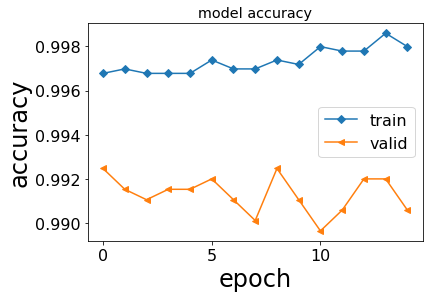

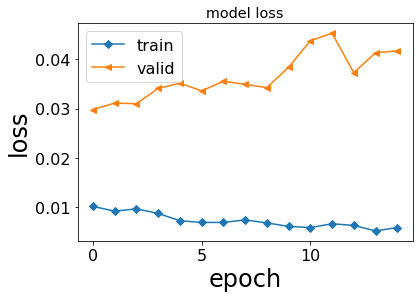

95/95 [==============================] - 0s 648us/step - loss: 0.0127 - accuracy: 0.9970

loss: 0.013

accuracy: 0.997
95/95 [==============================] - 0s 518us/step


{'0': {'precision': 0.9987864077669902,
  'recall': 1.0,
  'f1-score': 0.9993928354584092,
  'support': 2469},
 '1': {'precision': 1.0,
  'recall': 0.9689922480620154,
  'f1-score': 0.9842519685039369,
  'support': 129},
 '2': {'precision': 0.9831223628691983,
  'recall': 0.9914893617021276,
  'f1-score': 0.9872881355932204,
  'support': 235},
 '3': {'precision': 0.9902439024390244,
  'recall': 0.9854368932038835,
  'f1-score': 0.9878345498783455,
  'support': 206},
 'accuracy': 0.9970384995064165,
 'macro avg': {'precision': 0.9930381682688032,
  'recall': 0.9864796257420065,
  'f1-score': 0.9896918723584779,
  'support': 3039},
 'weighted avg': {'precision': 0.9970475945881538,
  'recall': 0.9970384995064165,
  'f1-score': 0.9970306165920256,
  'support': 3039}}

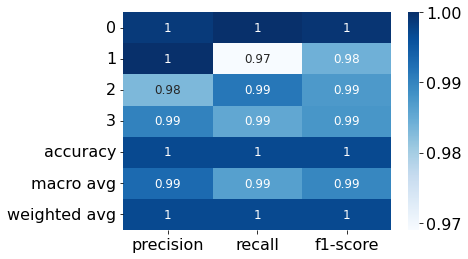

array([[2469,    0,    0,    0],
       [   3,  125,    1,    0],
       [   0,    0,  233,    2],
       [   0,    0,    3,  203]])

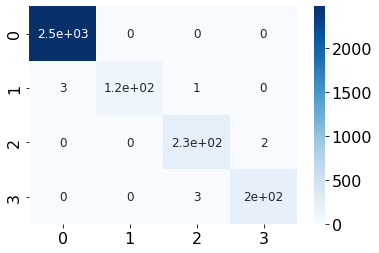

In [130]:
NN_Model_Result(zNorm_train_x, zNorm_train_y,zNorm_test_x, zNorm_test_y,model_zNorm,len(zNorm_test_x),.30,15,5)

# Experient with new feature set by FA 

In [113]:
input_dim = len(fa_train_frame_x.columns)
def create_model_fa():
    model = Sequential()
    model.add(L.Dense(12, input_dim=input_dim, activation='softsign'))
    model.add(L.Dense(12, activation='softsign'))
    model.add(L.Dense(4, activation='softsign'))
    model.add(L.Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer = 'Nadam', metrics=['accuracy'])
    return model

Confidence of the model learned on FA based reduced feature data

In [114]:
adam_model = KerasClassifier(create_model,epochs=20, batch_size=20, verbose=0)
adam_model.fit(fa_train_x, fa_train_y.ravel())
X = np.concatenate([fa_train_x, fa_test_x], axis=0)
y = np.concatenate([fa_train_y, fa_test_y], axis=0)
cv_score(adam_model, X, y.ravel())

/var/folders/k3/yr6xqkcd6dx_w09lmqq7y7h80000gn/T/ipykernel_93228/3470274639.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  adam_model = KerasClassifier(create_model,epochs=20, batch_size=20, verbose=0)


32/32 [==============================] - 0s 513us/step
{'fit_time': array([20.75375009, 21.12313032, 20.68760824, 20.86249709, 21.07214594,
       20.75106812, 20.64258099, 21.23070526,  8.37699103,  8.29306912]), 'score_time': array([0.26625514, 0.11656189, 0.22463584, 0.19754767, 0.10535216,
       0.23140693, 0.21205497, 0.09657884, 0.08999896, 0.09658003]), 'test_accuracy': array([0.99506417, 0.99308983, 0.994077  , 0.99210267, 0.9911155 ,
       0.99506417, 0.99012833, 0.9911155 , 0.99012833, 0.98715415]), 'test_precision_macro': array([0.98324324, 0.9771319 , 0.97928571, 0.97617951, 0.97131165,
       0.98750037, 0.96378284, 0.97021926, 0.96975858, 0.96087899]), 'test_recall_macro': array([0.98324324, 0.97174913, 0.9779835 , 0.97327866, 0.97161073,
       0.98188406, 0.96708937, 0.97365421, 0.97896328, 0.9510453 ]), 'test_f1_macro': array([0.98322148, 0.97440777, 0.97860287, 0.97458917, 0.97143793,
       0.98419916, 0.96495984, 0.9705429 , 0.97425385, 0.95296978])}
accuracy:  0.

In [115]:
model_fa = create_model_fa()

prediction and evaluation for model learned on fa data

Epoch 1/15
189/993 [====>.........................] - ETA: 0s - loss: 0.0053 - accuracy: 0.9989

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


993/993 [==============================] - 1s 1ms/step - loss: 0.0136 - accuracy: 0.9954 - val_loss: 0.0375 - val_accuracy: 0.9897
Epoch 2/15
993/993 [==============================] - 1s 889us/step - loss: 0.0137 - accuracy: 0.9952 - val_loss: 0.0434 - val_accuracy: 0.9882
Epoch 3/15
993/993 [==============================] - 1s 893us/step - loss: 0.0125 - accuracy: 0.9956 - val_loss: 0.0359 - val_accuracy: 0.9897
Epoch 4/15
993/993 [==============================] - 1s 922us/step - loss: 0.0117 - accuracy: 0.9960 - val_loss: 0.0362 - val_accuracy: 0.9906
Epoch 5/15
993/993 [==============================] - 1s 959us/step - loss: 0.0123 - accuracy: 0.9954 - val_loss: 0.0352 - val_accuracy: 0.9911
Epoch 6/15
993/993 [==============================] - 1s 953us/step - loss: 0.0106 - accuracy: 0.9956 - val_loss: 0.0372 - val_accuracy: 0.9897
Epoch 7/15
993/993 [==============================] - 1s 951us/step - loss: 0.0099 - accuracy: 0.9966 - val_loss: 0.0344 - val_accuracy: 0.9901
Epoch

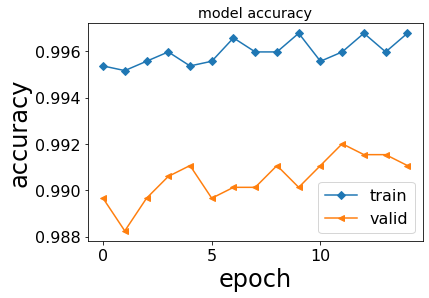

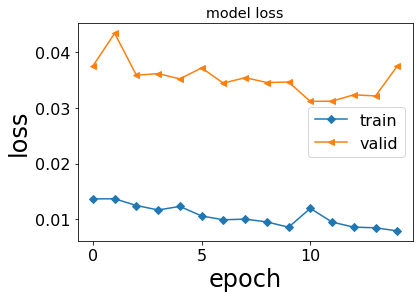

95/95 [==============================] - 0s 593us/step - loss: 0.0216 - accuracy: 0.9947

loss: 0.022

accuracy: 0.995
95/95 [==============================] - 0s 503us/step


{'0': {'precision': 0.9995939910678034,
  'recall': 0.9995939910678034,
  'f1-score': 0.9995939910678034,
  'support': 2463},
 '1': {'precision': 1.0,
  'recall': 0.9787234042553191,
  'f1-score': 0.989247311827957,
  'support': 141},
 '2': {'precision': 0.978448275862069,
  'recall': 0.9742489270386266,
  'f1-score': 0.9763440860215055,
  'support': 233},
 '3': {'precision': 0.9660194174757282,
  'recall': 0.9851485148514851,
  'f1-score': 0.9754901960784313,
  'support': 202},
 'accuracy': 0.995722277064824,
 'macro avg': {'precision': 0.9860154211014001,
  'recall': 0.9844287093033086,
  'f1-score': 0.9851688962489243,
  'support': 3039},
 'weighted avg': {'precision': 0.9957599113543794,
  'recall': 0.995722277064824,
  'f1-score': 0.9957292078376426,
  'support': 3039}}

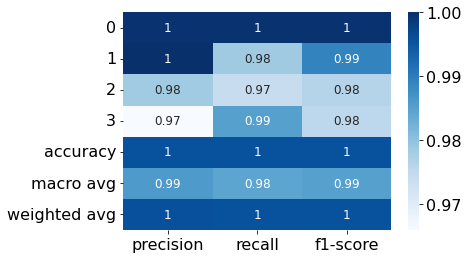

array([[2462,    0,    0,    1],
       [   0,  138,    3,    0],
       [   0,    0,  227,    6],
       [   1,    0,    2,  199]])

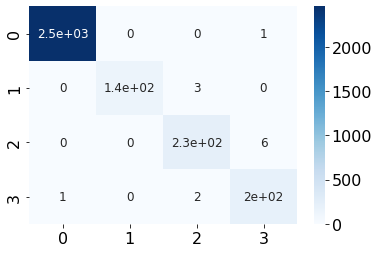

In [131]:
NN_Model_Result(fa_train_x, fa_train_y,fa_test_x, fa_test_y,model_fa,len(fa_test_x),.30,15,5)

# Experiment with feature representation by LDA


In [117]:
input_dim = len(lda_train_frame_x.columns)
def create_model_lda():
    model = Sequential()
    model.add(L.Dense(12, input_dim=input_dim, activation='softsign'))
    model.add(L.Dense(12, activation='softsign'))
    model.add(L.Dense(4, activation='softsign'))
    model.add(L.Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer = 'Nadam', metrics=['accuracy'])
    return model


Confidence interval for the model learned on lda data

In [118]:
adam_model = KerasClassifier(create_model_lda,epochs=20, batch_size=20, verbose=0)
adam_model.fit(lda_train_x, lda_train_y.ravel())
X = np.concatenate([lda_train_x, lda_test_x], axis=0)
y = np.concatenate([lda_train_y, lda_test_y], axis=0)
cv_score(adam_model, X, y.ravel())

/var/folders/k3/yr6xqkcd6dx_w09lmqq7y7h80000gn/T/ipykernel_93228/3570088967.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  adam_model = KerasClassifier(create_model_lda,epochs=20, batch_size=20, verbose=0)


32/32 [==============================] - 0s 2ms/step
{'fit_time': array([30.73885298, 30.75867391, 30.47274804, 29.97663021, 30.27693105,
       30.91279674, 30.77793598, 29.62832522, 19.13291597, 19.04079103]), 'score_time': array([0.36744285, 0.35614395, 0.58753514, 0.45239687, 0.30292201,
       0.270293  , 0.32119489, 0.41091084, 0.22231317, 0.20978308]), 'test_accuracy': array([0.99506417, 0.994077  , 0.99210267, 0.99308983, 0.9911155 ,
       0.9970385 , 0.99506417, 0.99210267, 0.98914116, 0.98616601]), 'test_precision_macro': array([0.98326592, 0.97733275, 0.97845611, 0.97691692, 0.97234988,
       0.98958333, 0.98328824, 0.97088635, 0.96637608, 0.95606517]), 'test_recall_macro': array([0.98324324, 0.97652119, 0.9714198 , 0.97444616, 0.97371047,
       0.99618512, 0.98258857, 0.9801436 , 0.9721283 , 0.9515152 ]), 'test_f1_macro': array([0.98317051, 0.97670977, 0.97476733, 0.97538147, 0.97274977,
       0.9927627 , 0.98288871, 0.97545508, 0.96923019, 0.95331063])}
accuracy:  0.99

In [119]:
model_lda = create_model_lda()

prediction and evaluation of the model learned on lda

Epoch 1/15
192/993 [====>.........................] - ETA: 0s - loss: 0.0226 - accuracy: 0.9937

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


993/993 [==============================] - 1s 987us/step - loss: 0.0212 - accuracy: 0.9940 - val_loss: 0.0358 - val_accuracy: 0.9897
Epoch 2/15
993/993 [==============================] - 1s 955us/step - loss: 0.0208 - accuracy: 0.9934 - val_loss: 0.0344 - val_accuracy: 0.9929
Epoch 3/15
993/993 [==============================] - 1s 958us/step - loss: 0.0204 - accuracy: 0.9927 - val_loss: 0.0349 - val_accuracy: 0.9901
Epoch 4/15
993/993 [==============================] - 1s 924us/step - loss: 0.0202 - accuracy: 0.9938 - val_loss: 0.0360 - val_accuracy: 0.9897
Epoch 5/15
993/993 [==============================] - 1s 944us/step - loss: 0.0211 - accuracy: 0.9925 - val_loss: 0.0365 - val_accuracy: 0.9920
Epoch 6/15
993/993 [==============================] - 1s 903us/step - loss: 0.0196 - accuracy: 0.9942 - val_loss: 0.0362 - val_accuracy: 0.9897
Epoch 7/15
993/993 [==============================] - 1s 980us/step - loss: 0.0195 - accuracy: 0.9938 - val_loss: 0.0352 - val_accuracy: 0.9911
Epo

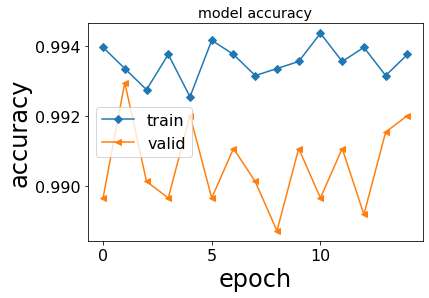

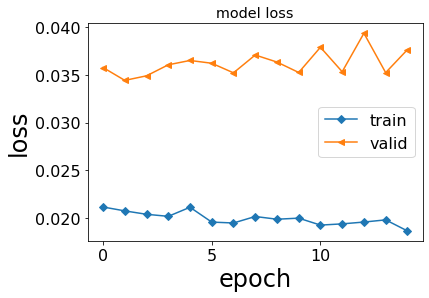

95/95 [==============================] - 0s 549us/step - loss: 0.0316 - accuracy: 0.9901

loss: 0.032

accuracy: 0.990
95/95 [==============================] - 0s 469us/step


{'0': {'precision': 0.997979797979798,
  'recall': 0.9991909385113269,
  'f1-score': 0.9985850010107136,
  'support': 2472},
 '1': {'precision': 0.9632352941176471,
  'recall': 0.9849624060150376,
  'f1-score': 0.9739776951672863,
  'support': 133},
 '2': {'precision': 0.9571428571428572,
  'recall': 0.9348837209302325,
  'f1-score': 0.9458823529411765,
  'support': 215},
 '3': {'precision': 0.9495412844036697,
  'recall': 0.9452054794520548,
  'f1-score': 0.9473684210526315,
  'support': 219},
 'accuracy': 0.9901283316880553,
 'macro avg': {'precision': 0.966974808410993,
  'recall': 0.9660606362271629,
  'f1-score': 0.966453367542952,
  'support': 3039},
 'weighted avg': {'precision': 0.9900795032227131,
  'recall': 0.9901283316880553,
  'f1-score': 0.9900886956395565,
  'support': 3039}}

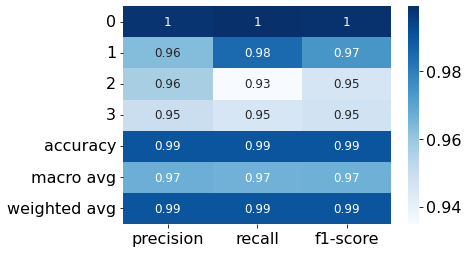

array([[2470,    0,    0,    2],
       [   0,  131,    2,    0],
       [   0,    5,  201,    9],
       [   5,    0,    7,  207]])

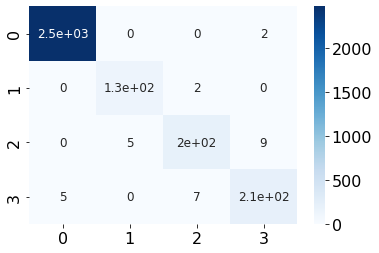

In [132]:
NN_Model_Result(lda_train_x, lda_train_y,lda_test_x,lda_test_y,model_lda,len(lda_test_x),.30,15,5)

# Experiment with features by PCA


In [121]:
input_dim = len(pca_train_frame_x.columns)
def create_model_pca():
    model = Sequential()
    model.add(L.Dense(12, input_dim=input_dim, activation='softsign'))
    model.add(L.Dense(12, activation='softsign'))
    model.add(L.Dense(4, activation='softsign'))
    model.add(L.Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer = 'Nadam', metrics=['accuracy'])
    return model

Confidence of the model learned on PCA based reduced data

In [122]:
adam_model = KerasClassifier(create_model_pca,epochs=20, batch_size=20, verbose=0)
adam_model.fit(pca_train_x, pca_train_y.ravel())
X = np.concatenate([pca_train_x, pca_test_x], axis=0)
y = np.concatenate([pca_train_y, pca_test_y], axis=0)
cv_score(adam_model, X, y.ravel())

/var/folders/k3/yr6xqkcd6dx_w09lmqq7y7h80000gn/T/ipykernel_93228/136591194.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  adam_model = KerasClassifier(create_model_pca,epochs=20, batch_size=20, verbose=0)


32/32 [==============================] - 0s 508us/step
{'fit_time': array([17.10065722, 17.17287803, 16.59120393, 17.07007003, 17.08973193,
       17.1342411 , 16.71861696, 16.84655404,  7.4550221 ,  7.34677196]), 'score_time': array([0.15177774, 0.10029006, 0.22176409, 0.1388731 , 0.11508918,
       0.09508514, 0.19676113, 0.17957401, 0.07961488, 0.07789111]), 'test_accuracy': array([0.98617966, 0.970385  , 0.99012833, 0.98617966, 0.97433366,
       0.982231  , 0.94866732, 0.982231  , 0.9792695 , 0.9812253 ]), 'test_precision_macro': array([0.95728662, 0.89431788, 0.96874087, 0.94660088, 0.91365131,
       0.94434132, 0.79296044, 0.93780181, 0.93330804, 0.94503181]), 'test_recall_macro': array([0.94704435, 0.88264041, 0.96310986, 0.94848676, 0.91337072,
       0.93793539, 0.79992344, 0.9358181 , 0.93991806, 0.92569356]), 'test_f1_macro': array([0.95137532, 0.88825637, 0.96583052, 0.94725108, 0.91283082,
       0.93964225, 0.7932442 , 0.9356203 , 0.93642164, 0.93283838])}
accuracy:  0.

In [123]:
model_pca = create_model_pca()

Prediction and evaluation of the PCA learned model

Epoch 1/15
222/993 [=====>........................] - ETA: 0s - loss: 0.0034 - accuracy: 1.0000

/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


993/993 [==============================] - 1s 899us/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.0376 - val_accuracy: 0.9901
Epoch 2/15
993/993 [==============================] - 1s 849us/step - loss: 0.0093 - accuracy: 0.9966 - val_loss: 0.0375 - val_accuracy: 0.9906
Epoch 3/15
993/993 [==============================] - 1s 923us/step - loss: 0.0098 - accuracy: 0.9966 - val_loss: 0.0364 - val_accuracy: 0.9911
Epoch 4/15
993/993 [==============================] - 1s 898us/step - loss: 0.0090 - accuracy: 0.9958 - val_loss: 0.0389 - val_accuracy: 0.9901
Epoch 5/15
993/993 [==============================] - 1s 998us/step - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.0428 - val_accuracy: 0.9906
Epoch 6/15
993/993 [==============================] - 1s 920us/step - loss: 0.0088 - accuracy: 0.9970 - val_loss: 0.0417 - val_accuracy: 0.9901
Epoch 7/15
993/993 [==============================] - 1s 981us/step - loss: 0.0092 - accuracy: 0.9966 - val_loss: 0.0380 - val_accuracy: 0.9915
Epo

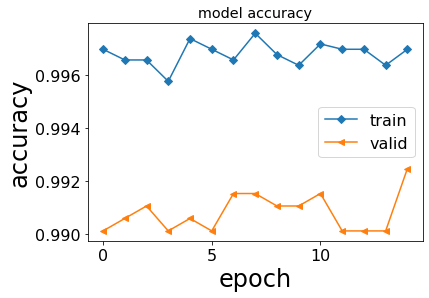

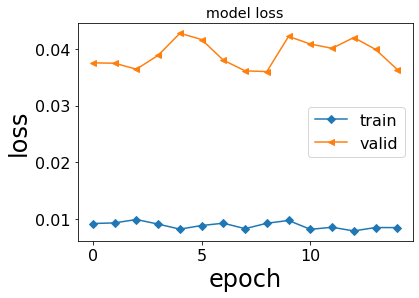

95/95 [==============================] - 0s 548us/step - loss: 0.0475 - accuracy: 0.9905

loss: 0.048

accuracy: 0.990
95/95 [==============================] - 0s 444us/step


{'0': {'precision': 0.9983967935871744,
  'recall': 0.9991977537103891,
  'f1-score': 0.9987971130713712,
  'support': 2493},
 '1': {'precision': 0.9609375,
  'recall': 0.9389312977099237,
  'f1-score': 0.9498069498069499,
  'support': 131},
 '2': {'precision': 0.9485981308411215,
  'recall': 0.9666666666666667,
  'f1-score': 0.9575471698113207,
  'support': 210},
 '3': {'precision': 0.9603960396039604,
  'recall': 0.9463414634146341,
  'f1-score': 0.9533169533169533,
  'support': 205},
 'accuracy': 0.9907864429088517,
 'macro avg': {'precision': 0.967082116008064,
  'recall': 0.9627842953754034,
  'f1-score': 0.9648670465016489,
  'support': 3039},
 'weighted avg': {'precision': 0.9907774973702774,
  'recall': 0.9907864429088517,
  'f1-score': 0.99076696097466,
  'support': 3039}}

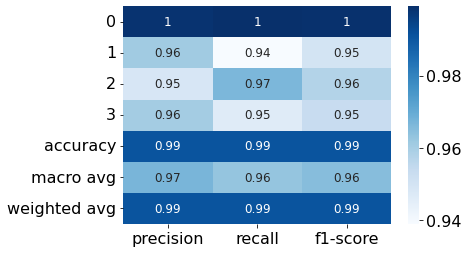

array([[2491,    2,    0,    0],
       [   1,  123,    6,    1],
       [   0,    0,  203,    7],
       [   3,    3,    5,  194]])

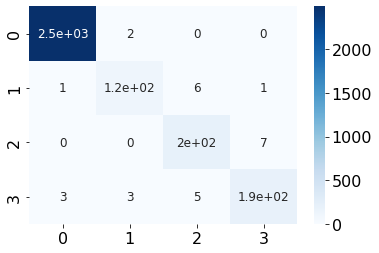

In [133]:
NN_Model_Result(pca_train_x, pca_train_y,pca_test_x,pca_test_y,model_pca,len(pca_test_x),.30,15,5)

# Experiment with TSNE based feature representation data


In [86]:
input_dim = len(tsne_train_frame_x.columns)
def create_model_tsne():
    model = Sequential()
    model.add(L.Dense(12, input_dim=input_dim, activation='softsign'))
    model.add(L.Dense(12, activation='softsign'))
    model.add(L.Dense(4, activation='softsign'))
    model.add(L.Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer = 'Nadam', metrics=['accuracy'])
    return model


confidence of the model learned on TSNE feature representation

In [ ]:
adam_model = KerasClassifier(create_model_tsne,epochs=20, batch_size=20, verbose=0)
adam_model.fit(tsne_train_x, tsne_train_y.ravel())
X = np.concatenate([tsne_train_x, tsne_test_x], axis=0)
y = np.concatenate([tsne_train_y, tsne_test_y], axis=0)
cv_score(adam_model, X, y.ravel())

In [87]:
model_tsne = create_model_tsne()

Prediction and evaluation of model learned on TSNE feature representation

Epoch 1/15


/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jaminurislam/opt/anaconda3/envs/detection/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


993/993 [==============================] - 1s 957us/step - loss: 0.6319 - accuracy: 0.7876 - val_loss: 0.3526 - val_accuracy: 0.8590
Epoch 2/15
993/993 [==============================] - 1s 843us/step - loss: 0.3446 - accuracy: 0.8606 - val_loss: 0.2900 - val_accuracy: 0.8853
Epoch 3/15
993/993 [==============================] - 1s 960us/step - loss: 0.2948 - accuracy: 0.8880 - val_loss: 0.2678 - val_accuracy: 0.8900
Epoch 4/15
993/993 [==============================] - 1s 937us/step - loss: 0.2372 - accuracy: 0.9259 - val_loss: 0.1842 - val_accuracy: 0.9492
Epoch 5/15
993/993 [==============================] - 1s 847us/step - loss: 0.1816 - accuracy: 0.9510 - val_loss: 0.1884 - val_accuracy: 0.9351
Epoch 6/15
993/993 [==============================] - 1s 911us/step - loss: 0.1564 - accuracy: 0.9529 - val_loss: 0.1418 - val_accuracy: 0.9572
Epoch 7/15
993/993 [==============================] - 1s 915us/step - loss: 0.1428 - accuracy: 0.9559 - val_loss: 0.1465 - val_accuracy: 0.9553
Epo

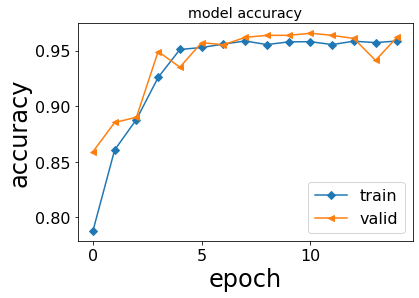

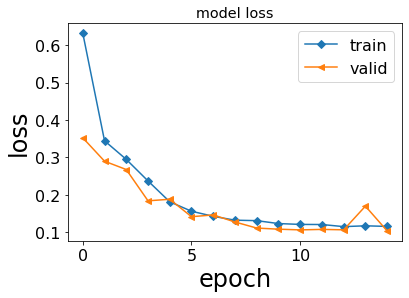

95/95 [==============================] - 0s 571us/step - loss: 0.1197 - accuracy: 0.9543

loss: 0.120

accuracy: 0.954
7/7 [==============================] - 0s 692us/step


{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 152},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 13},
 '2': {'precision': 0.6666666666666666,
  'recall': 0.8,
  'f1-score': 0.7272727272727272,
  'support': 15},
 '3': {'precision': 0.8235294117647058,
  'recall': 0.7,
  'f1-score': 0.7567567567567567,
  'support': 20},
 'accuracy': 0.955,
 'macro avg': {'precision': 0.8725490196078431,
  'recall': 0.875,
  'f1-score': 0.8710073710073709,
  'support': 200},
 'weighted avg': {'precision': 0.9573529411764706,
  'recall': 0.955,
  'f1-score': 0.9552211302211302,
  'support': 200}}

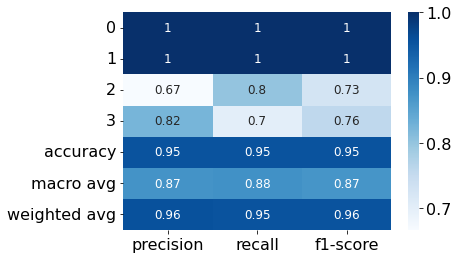

array([[152,   0,   0,   0],
       [  0,  13,   0,   0],
       [  0,   0,  12,   3],
       [  0,   0,   6,  14]])

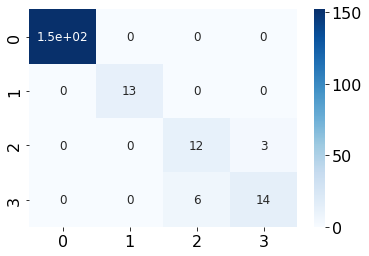

In [88]:
NN_Model_Result(tsne_train_x, tsne_train_y,tsne_test_x,tsne_test_y,model_tsne,200,.30,15,5)